Згенеровані дані: [567.51688384 211.21529768 714.48898361 574.97267908 734.70386453
 187.19850117 588.72238562 667.53542215 575.21501683  64.84162643]
Нормалізовані дані: [[0.56747037]
 [0.21065163]
 [0.71465579]
 [0.57493698]
 [0.73490001]
 [0.18659998]
 [0.58870665]
 [0.66763408]
 [0.57517967]
 [0.06406551]]
Розмір навчальної вибірки: 800
Розмір тестової вибірки: 200
Найкраще значення K: 1
Результати для кожного K: {1: 6.652303740982771e-07, 2: 6.699009699004706e-07, 3: 7.556479134795837e-07, 4: 7.974114168449872e-07, 5: 9.571191136255913e-07, 6: 1.0747634685319368e-06, 7: 1.14454101359057e-06, 8: 1.2133171399349794e-06, 9: 1.3441641779587656e-06, 10: 1.3535669422090282e-06, 11: 1.4369607197583688e-06, 12: 1.6830600497753708e-06, 13: 1.955019095674708e-06, 14: 2.1995559621132655e-06, 15: 2.190294317567268e-06, 16: 2.372888203348804e-06, 17: 2.498267396049074e-06, 18: 2.7431221946971863e-06, 19: 3.4048816245102463e-06}


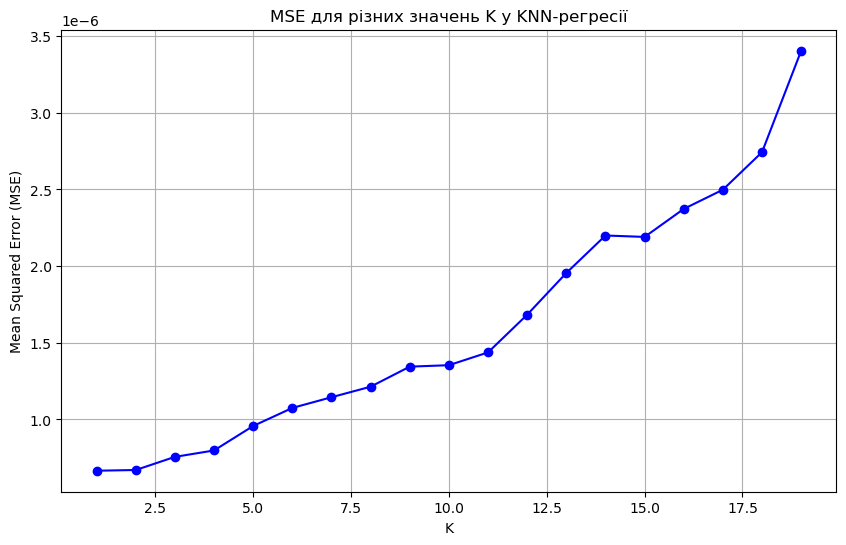

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Крок 1: Генерація випадкових даних
data = np.random.rand(1000) * 1000
print("Згенеровані дані:", data[:10])  # Виведемо перші 10 елементів для перевірки

# Крок 2: Нормалізація даних
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data.reshape(-1, 1))
print("Нормалізовані дані:", data_normalized[:10])  # Перевірка перших 10 елементів

# Крок 3: Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(data_normalized, data_normalized, test_size=0.2, random_state=42)
print(f"Розмір навчальної вибірки: {len(X_train)}")
print(f"Розмір тестової вибірки: {len(X_test)}")

# Крок 4: Навчання KNN-регресора з різними значеннями K
def evaluate_knn(X_train, X_test, y_train, y_test, k_values):
    best_k = None
    best_mse = float('inf')
    results = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        
        results[k] = mse
        
        if mse < best_mse:
            best_mse = mse
            best_k = k
    
    return best_k, results

k_values = range(1, 20)
best_k, results = evaluate_knn(X_train, X_test, y_train, y_test, k_values)
print(f"Найкраще значення K: {best_k}")
print(f"Результати для кожного K: {results}")

# Крок 5: Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o', color='b')
plt.title('MSE для різних значень K у KNN-регресії')
plt.xlabel('K')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

